# Startups Project
## IN015 - Data Mining 
- Professor: Pablo Hernandez
- Students:
    - José Pablo del Moral García
    - Marc Esteller Sánchez
    - Òscar Grau Gesa
    - Clara Jiménez i Seoane
    - Luke Harrison Perreault

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Setup Libraries
%matplotlib inline

In [4]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print or use the current working directory as needed
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\José Pablo del Moral\Documents\4to semestre\Data mining\notebooks\Final project


In [5]:
os.chdir('C:/Users/José Pablo del Moral/Documents/4to semestre/Data mining/datasets')

## Get the Data

In [6]:
df = pd.read_csv('../datasets/startup_traction.csv')
df.shape

(700, 30)

In [7]:
df.sample(5)

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
134,1495,ENAIR ENERGY SL,SPAIN,CASTALLA ALICANTE,http://www.enair.es,950771885,1,INCEPTION,258.0,112.662791,...,0.015504,0.002508,120.0,0.075235,0.465116,120.0,0.075235,0.465116,1.236434,0
554,1738,DACON AS,NORWAY,STABEKK,http://www.dacon.no,998870984,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
157,1267,FLEXBIMEC INTERNATIONAL SRL,ITALY,ALBINEA,http://www.flexbimec.com,936391053,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
102,1372,SEDICII INNOVATIONS LIMITED,IRELAND,WATERFORD,http://www.sedicii.com,938487514,1,INCEPTION,1331.0,126.369647,...,0.022539,0.019455,426.0,0.276265,0.320060,426.0,0.276265,0.320060,59.786627,0
152,833,PAUMAX OY,FINLAND,SALO,http://www.aina-wireless.com,923643604,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   name                     700 non-null    object 
 2   country                  700 non-null    object 
 3   city                     700 non-null    object 
 4   web                      649 non-null    object 
 5   PIC                      700 non-null    int64  
 6   stage_order              700 non-null    int64  
 7   stage_name               700 non-null    object 
 8   tweet_count              309 non-null    float64
 9   tweet_length             309 non-null    float64
 10  tweet_rate               309 non-null    float64
 11  original_ratio           307 non-null    float64
 12  retweeted_ratio          289 non-null    float64
 13  replied_to_ratio         243 non-null    float64
 14  quoted_ratio             2

## Clean the data

As we can see with df.info() there are many nulls, we are going to analyze them. Since the ratios are calculated through the variables count, we are going to see more in deep just the count variables and see how can we fix those nulls.

In [9]:
null_web = df[df['web'].isnull()]
null_web

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1109,CASCADE,FRANCE,CLAMART,NaN,934348718,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,105,SAGANATURA EHF,ICELAND,HAFNARFJORDUR,NaN,902859414,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20,441,MIRMEX MOTOR,BELGIUM,CHIMAY,NaN,911270381,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30,344,JPU.IO LTD,ISRAEL,PETACH TIKVA,NaN,910101822,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,90,GREENVOLT NANOMA EHF,ICELAND,REYKJAVIK,NaN,901250378,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87,350,BOTSANDUS LTD,UNITED KINGDOM,BOURNE END,NaN,910321333,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
89,1183,DIANIA TECHNOLOGIES LIMITED,IRELAND,GALWAY,NaN,934968451,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
91,1242,ADA HEALTH GMBH,GERMANY,BERLIN,NaN,935923028,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,451,NEWPACE LTD,ISRAEL,CAESAREA,NaN,911414038,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
null_tw_count = df[df['tweet_count'].isnull()]
null_tw_count

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,266,NEOMEDLIGHT,FRANCE,VILLEURBANNE,http://www.neomedlight.com,906740675,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1704,"ROVALMA, S.A",SPAIN,TERRASSA,http://www.rovalma.com,996728545,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,763,CERCARE MEDICAL APS,DENMARK,AARHUS C,http://www.cercaremedical.com,920595961,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
695,835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
696,1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
698,559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
null_retw_count = df[df['retweet_count'].isnull()]
null_retw_count

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,266,NEOMEDLIGHT,FRANCE,VILLEURBANNE,http://www.neomedlight.com,906740675,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1704,"ROVALMA, S.A",SPAIN,TERRASSA,http://www.rovalma.com,996728545,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,763,CERCARE MEDICAL APS,DENMARK,AARHUS C,http://www.cercaremedical.com,920595961,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
695,835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
696,1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
698,559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
null_r_count = df[df['reply_count'].isnull()]
null_r_count

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,266,NEOMEDLIGHT,FRANCE,VILLEURBANNE,http://www.neomedlight.com,906740675,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1704,"ROVALMA, S.A",SPAIN,TERRASSA,http://www.rovalma.com,996728545,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,763,CERCARE MEDICAL APS,DENMARK,AARHUS C,http://www.cercaremedical.com,920595961,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
695,835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
696,1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
698,559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
null_like_count = df[df['like_count'].isnull()]
null_like_count

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,266,NEOMEDLIGHT,FRANCE,VILLEURBANNE,http://www.neomedlight.com,906740675,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1704,"ROVALMA, S.A",SPAIN,TERRASSA,http://www.rovalma.com,996728545,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,763,CERCARE MEDICAL APS,DENMARK,AARHUS C,http://www.cercaremedical.com,920595961,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
695,835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
696,1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
698,559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
null_q_count = df[df['quote_count'].isnull()]
null_q_count

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,266,NEOMEDLIGHT,FRANCE,VILLEURBANNE,http://www.neomedlight.com,906740675,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1704,"ROVALMA, S.A",SPAIN,TERRASSA,http://www.rovalma.com,996728545,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,763,CERCARE MEDICAL APS,DENMARK,AARHUS C,http://www.cercaremedical.com,920595961,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
695,835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
696,1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
698,559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
df1=df
df1['web'] = df1['web'].notna().astype(int)

Now we have droped the NaN from the column 'web' and now we will start for replacing those variables that we can't calculate for 0. Those variables are: 'tweet_count', 'tweet_length', 'retweet_count', 'reply_count', 'like_count' and 'quote_rate'.

In [16]:
df1 = df1.fillna({'tweet_count': 0, 'tweet_length': 0, 'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'replied_to_ratio': 0, 'quoted_ratio':0})

Now we replace the NaN from 'tweet_rate' with the formula.

In [17]:
def replace_nan_tweet(row):
    if pd.isna(row['tweet_rate']): 
        return row['tweet_count'] / 365
    else:
        return row['tweet_rate']

df1['tweet_rate'] = df1.apply(replace_nan_tweet, axis=1)


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   name                     700 non-null    object 
 2   country                  700 non-null    object 
 3   city                     700 non-null    object 
 4   web                      700 non-null    int32  
 5   PIC                      700 non-null    int64  
 6   stage_order              700 non-null    int64  
 7   stage_name               700 non-null    object 
 8   tweet_count              700 non-null    float64
 9   tweet_length             700 non-null    float64
 10  tweet_rate               700 non-null    float64
 11  original_ratio           307 non-null    float64
 12  retweeted_ratio          289 non-null    float64
 13  replied_to_ratio         700 non-null    float64
 14  quoted_ratio             7

The next ratio that we need to fix is the 'original_ratio', since we don't have the variable 'original_count' we are going to replace NaN with 0.

In [18]:
df1 = df1.fillna({'original_ratio': 0})

Now we will replace the NaN of the colum 'retweeted_ratio' with 0 because we don't have the count of the retweets done not received.

In [19]:
df1 = df1.fillna({'retweeted_ratio': 0})

In [20]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [21]:
unique_counts = df1['stage_success'].value_counts()
unique_counts

stage_success
0    589
1    111
Name: count, dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     700 non-null    object 
 1   country                  700 non-null    object 
 2   city                     700 non-null    object 
 3   web                      700 non-null    int32  
 4   PIC                      700 non-null    int64  
 5   stage_order              700 non-null    int64  
 6   stage_name               700 non-null    object 
 7   tweet_count              700 non-null    float64
 8   tweet_length             700 non-null    float64
 9   tweet_rate               700 non-null    float64
 10  original_ratio           700 non-null    float64
 11  retweeted_ratio          700 non-null    float64
 12  replied_to_ratio         700 non-null    float64
 13  quoted_ratio             700 non-null    float64
 14  quoted_replied_to_ratio  1

In [23]:
df1 = df1.drop('quoted_replied_to_ratio', axis=1)
df1 = df1.drop('PIC', axis=1)

In [24]:
df1.describe()

,web,stage_order,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
count,700.000000,700.0,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,...,309.000000,309.000000,700.000000,309.000000,309.000000,700.000000,309.000000,309.000000,309.000000,700.000000
mean,0.927143,1.0,365.161429,72.783180,0.285777,0.275466,0.113375,0.028091,0.024444,1.010491e+04,...,0.080327,0.057807,691.714286,1.463221,2.041657,691.714286,1.463221,2.041657,28.363142,0.158571
std,0.260088,0.0,1705.114111,86.418634,1.192321,0.344637,0.184808,0.071819,0.051702,1.568470e+05,...,0.108577,0.176579,4325.509346,6.883328,2.929950,4325.509346,6.883328,2.929950,146.586992,0.365537
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191364,0.000000
25%,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.021622,0.002806,0.000000,0.094563,0.710247,0.000000,0.094563,0.710247,2.666667,0.000000
50%,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.048193,0.012644,0.000000,0.286169,1.492063,0.000000,0.286169,1.492063,4.738125,0.000000
75%,1.000000,1.0,162.250000,153.129324,0.186677,0.600000,0.181856,0.023222,0.032258,4.187500e+02,...,0.101974,0.033551,206.500000,0.925382,2.480000,206.500000,0.925382,2.480000,10.792899,0.000000
max,1.000000,1.0,32317.000000,290.000000,24.631860,1.000000,1.000000,0.716749,0.666667,4.116868e+06,...,1.044490,2.000000,84947.000000,97.000000,39.148528,84947.000000,97.000000,39.148528,2300.744681,1.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              700 non-null    object 
 1   country           700 non-null    object 
 2   city              700 non-null    object 
 3   web               700 non-null    int32  
 4   stage_order       700 non-null    int64  
 5   stage_name        700 non-null    object 
 6   tweet_count       700 non-null    float64
 7   tweet_length      700 non-null    float64
 8   tweet_rate        700 non-null    float64
 9   original_ratio    700 non-null    float64
 10  retweeted_ratio   700 non-null    float64
 11  replied_to_ratio  700 non-null    float64
 12  quoted_ratio      700 non-null    float64
 13  retweet_count     700 non-null    float64
 14  retweet_ratio     309 non-null    float64
 15  retweet_rate      309 non-null    float64
 16  reply_count       700 non-null    float64
 1

In [26]:
from sklearn.preprocessing import LabelEncoder

df1['country_enc'] = LabelEncoder().fit_transform(df1['country'])
df1['city_enc'] = LabelEncoder().fit_transform(df1['city'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              700 non-null    object 
 1   country           700 non-null    object 
 2   city              700 non-null    object 
 3   web               700 non-null    int32  
 4   stage_order       700 non-null    int64  
 5   stage_name        700 non-null    object 
 6   tweet_count       700 non-null    float64
 7   tweet_length      700 non-null    float64
 8   tweet_rate        700 non-null    float64
 9   original_ratio    700 non-null    float64
 10  retweeted_ratio   700 non-null    float64
 11  replied_to_ratio  700 non-null    float64
 12  quoted_ratio      700 non-null    float64
 13  retweet_count     700 non-null    float64
 14  retweet_ratio     309 non-null    float64
 15  retweet_rate      309 non-null    float64
 16  reply_count       700 non-null    float64
 1

In [28]:
df1.groupby('stage_name')['stage_order'].nunique()

stage_name
INCEPTION    1
Name: stage_order, dtype: int64

In [29]:
df1['stage_name'].value_counts()

stage_name
INCEPTION    700
Name: count, dtype: int64

In [30]:
df1 = df1.drop('stage_name', axis=1)
df1 = df1.drop('stage_order', axis=1)

### Data Analysis

In [31]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,retweet_ratio,retweet_rate,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
tweet_count,1.000000,0.210491,0.931892,0.236748,0.140220,0.150650,0.028264,0.201761,0.003458,0.182001,...,0.003878,0.529064,0.793557,0.480947,-0.016746,0.793557,0.480947,-0.016746,0.003106,0.036605
tweet_length,0.210491,1.000000,0.238044,0.895242,0.576217,0.385079,0.548826,0.058095,-0.050490,-0.036969,...,0.039734,-0.075642,0.174440,0.002217,0.184405,0.174440,0.002217,0.184405,-0.046608,0.196940
tweet_rate,0.931892,0.238044,1.000000,0.264859,0.152164,0.173079,0.043189,0.178034,0.001669,0.167575,...,0.031006,0.658410,0.770472,0.637473,0.028007,0.770472,0.637473,0.028007,0.002312,0.123814
original_ratio,0.236748,0.895242,0.264859,1.000000,0.351261,0.248997,0.379681,0.036025,-0.133049,-0.085697,...,-0.180355,-0.091614,0.158858,0.007293,-0.005523,0.158858,0.007293,-0.005523,-0.133226,0.245613
retweeted_ratio,0.140220,0.576217,0.152164,0.351261,1.000000,0.264999,0.352121,0.117913,0.125019,0.114635,...,0.004915,-0.006810,0.134024,0.014391,-0.031347,0.134024,0.014391,-0.031347,0.124296,0.247027
replied_to_ratio,0.150650,0.385079,0.173079,0.248997,0.264999,1.000000,0.234017,0.024150,0.054819,-0.007376,...,0.386522,0.304089,0.098543,-0.002022,0.002852,0.098543,-0.002022,0.002852,0.055079,0.165686
quoted_ratio,0.028264,0.548826,0.043189,0.379681,0.352121,0.234017,1.000000,0.001752,-0.005534,-0.044736,...,0.033621,-0.112357,0.055022,-0.065941,0.109459,0.055022,-0.065941,0.109459,-0.003124,0.050439
retweet_count,0.201761,0.058095,0.178034,0.036025,0.117913,0.024150,0.001752,1.000000,0.272430,0.988327,...,0.021089,0.162538,0.127772,0.061480,-0.009434,0.127772,0.061480,-0.009434,0.272005,-0.008591
retweet_ratio,0.003458,-0.050490,0.001669,-0.133049,0.125019,0.054819,-0.005534,0.272430,1.000000,0.371677,...,0.105421,0.012675,-0.000786,-0.004155,0.026474,-0.000786,-0.004155,0.026474,0.999775,0.083810
retweet_rate,0.182001,-0.036969,0.167575,-0.085697,0.114635,-0.007376,-0.044736,0.988327,0.371677,1.000000,...,0.027525,0.171510,0.110850,0.076268,-0.003064,0.110850,0.076268,-0.003064,0.371311,-0.011614


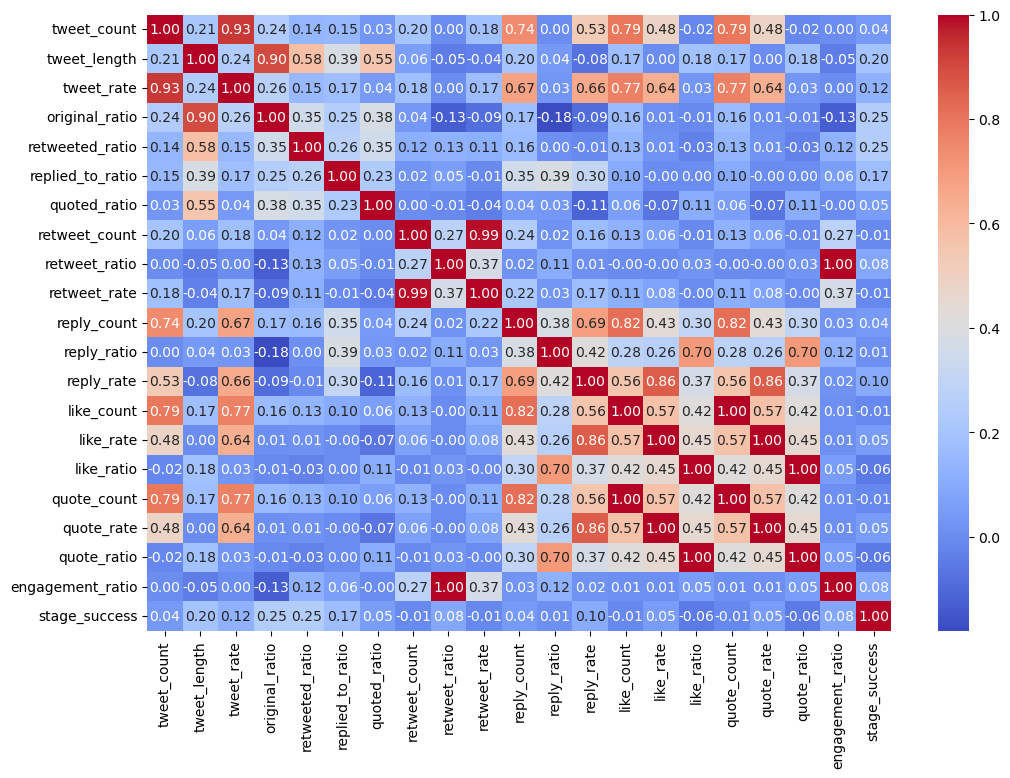

In [32]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

By looking at the correlation matrix, we can take out some of the variables as we can clearly see that there is multicollinearity between some of our variables, meaning that they are providing exactly the same information into our model and we should therefore take them out to make sure that or model performs well.

In [33]:
df1 = df1.drop('engagement_ratio', axis=1)
df1 = df1.drop(columns=['quote_rate', 'quote_ratio', 'quote_count', 'retweet_rate'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              700 non-null    object 
 1   country           700 non-null    object 
 2   city              700 non-null    object 
 3   web               700 non-null    int32  
 4   tweet_count       700 non-null    float64
 5   tweet_length      700 non-null    float64
 6   tweet_rate        700 non-null    float64
 7   original_ratio    700 non-null    float64
 8   retweeted_ratio   700 non-null    float64
 9   replied_to_ratio  700 non-null    float64
 10  quoted_ratio      700 non-null    float64
 11  retweet_count     700 non-null    float64
 12  retweet_ratio     309 non-null    float64
 13  reply_count       700 non-null    float64
 14  reply_ratio       309 non-null    float64
 15  reply_rate        309 non-null    float64
 16  like_count        700 non-null    float64
 1

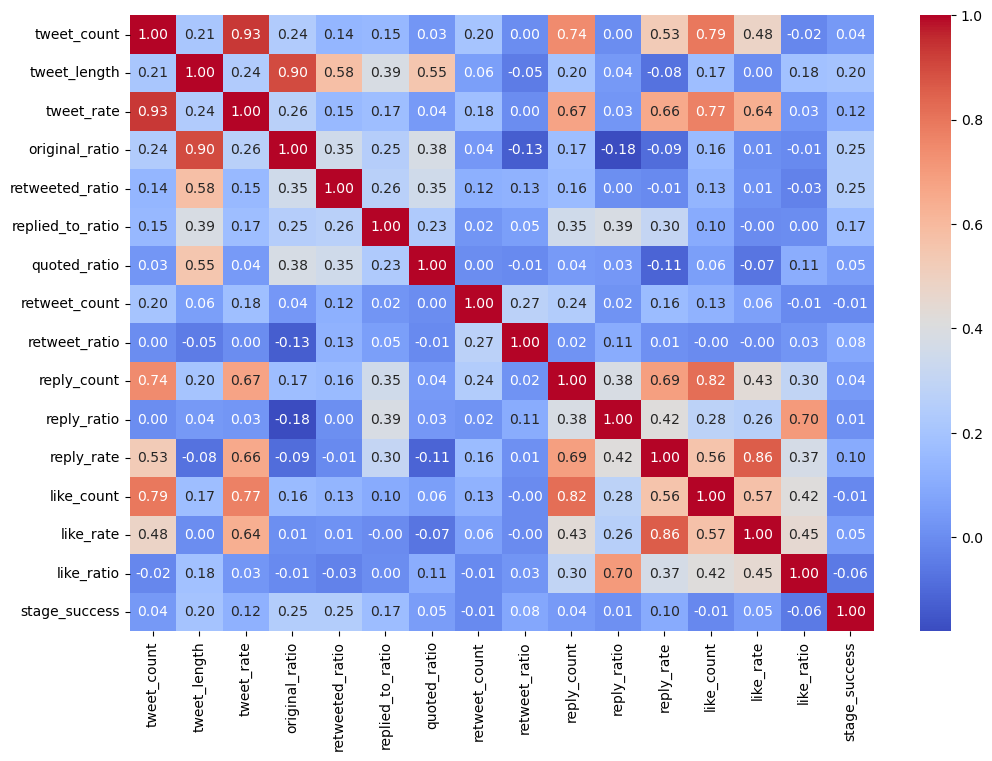

In [34]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

After analysing the heatmap we can conclude that the variables with the higher correlation are the following: 
engagement_ratio,
reply_rate,
retweet_ratio,
retweeted_ratio,
quoted_ratio,
original_ratio,
tweet_rate,
tweet_length,
PIC

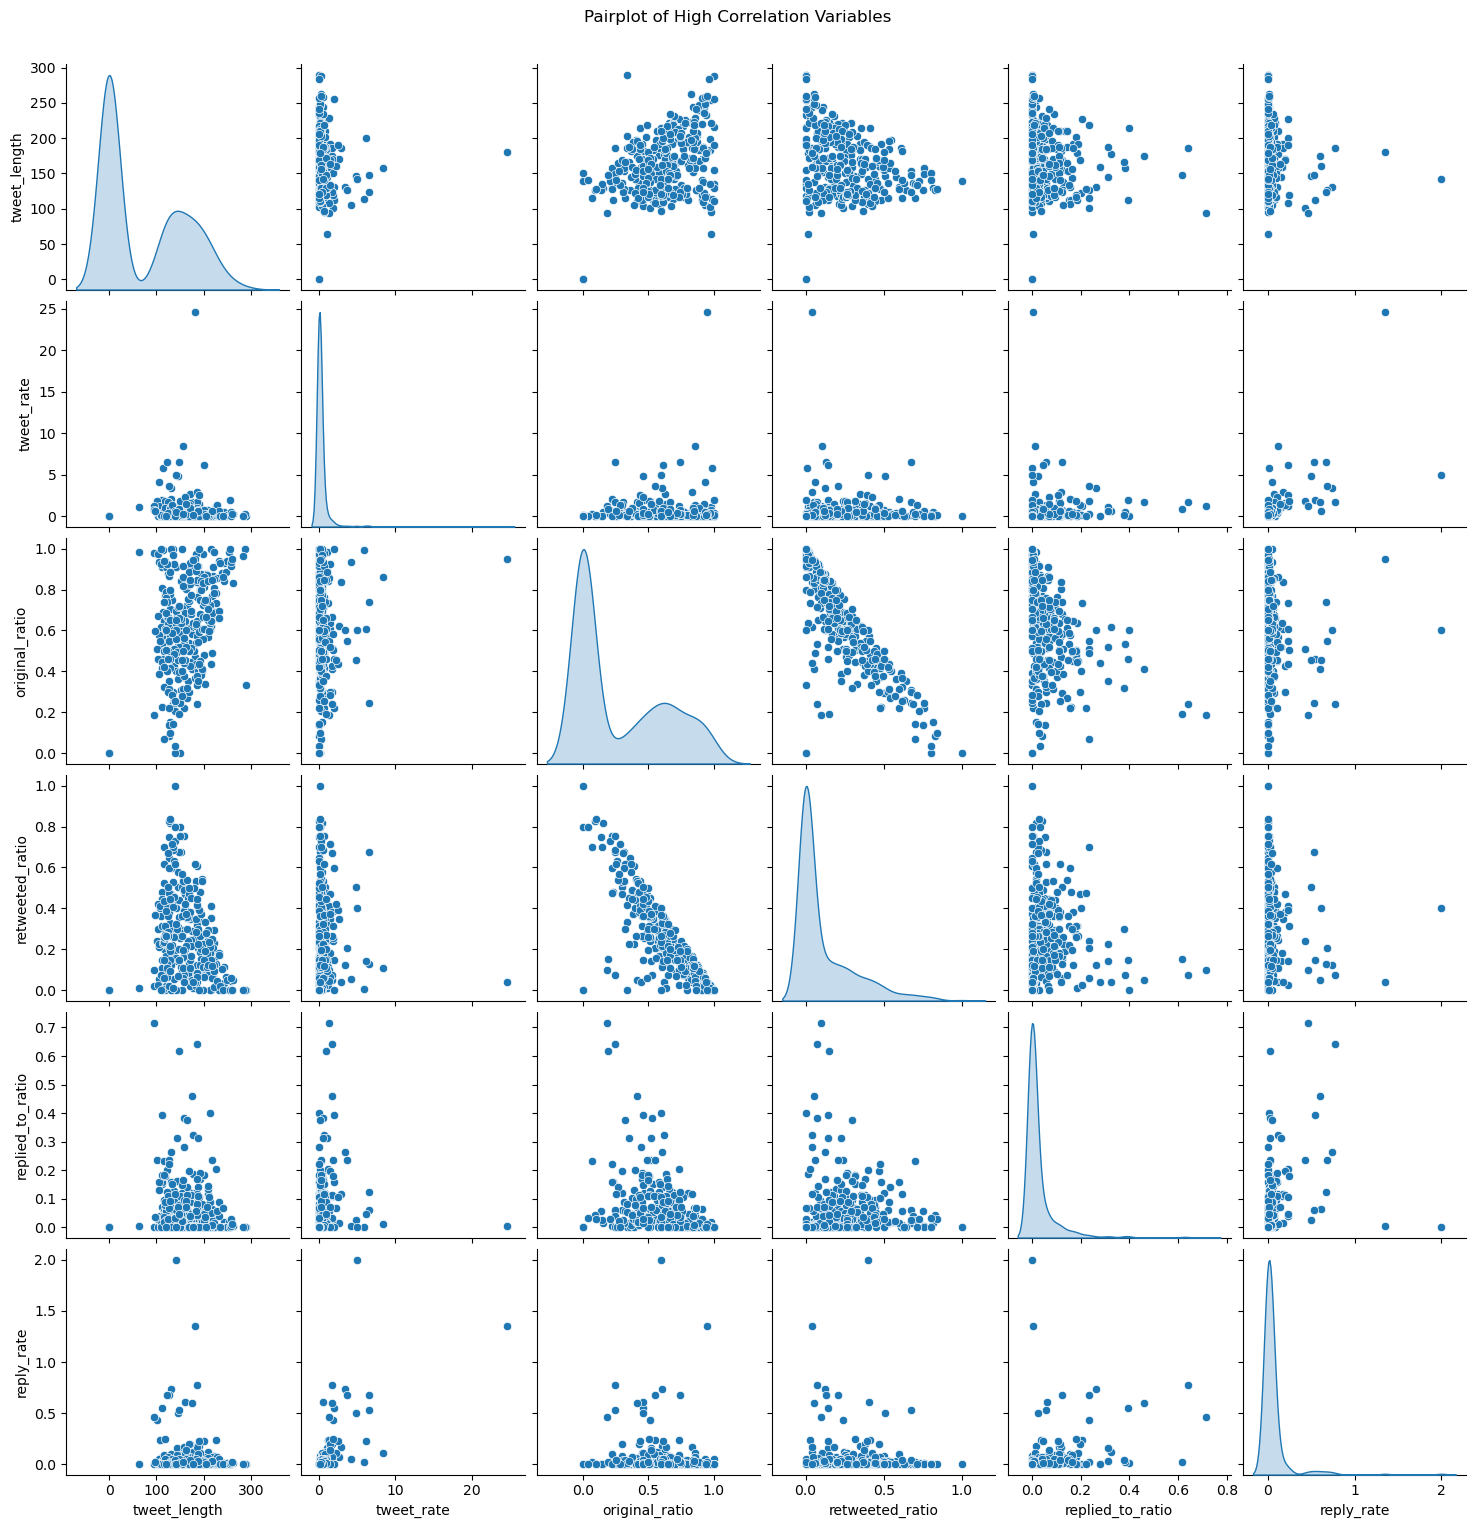

In [35]:
high_corr_vars = ['tweet_length', 'tweet_rate','original_ratio','retweeted_ratio','replied_to_ratio','reply_rate']
sns.pairplot(df1[high_corr_vars], diag_kind='kde')
plt.suptitle('Pairplot of High Correlation Variables', y=1.02)
plt.show()

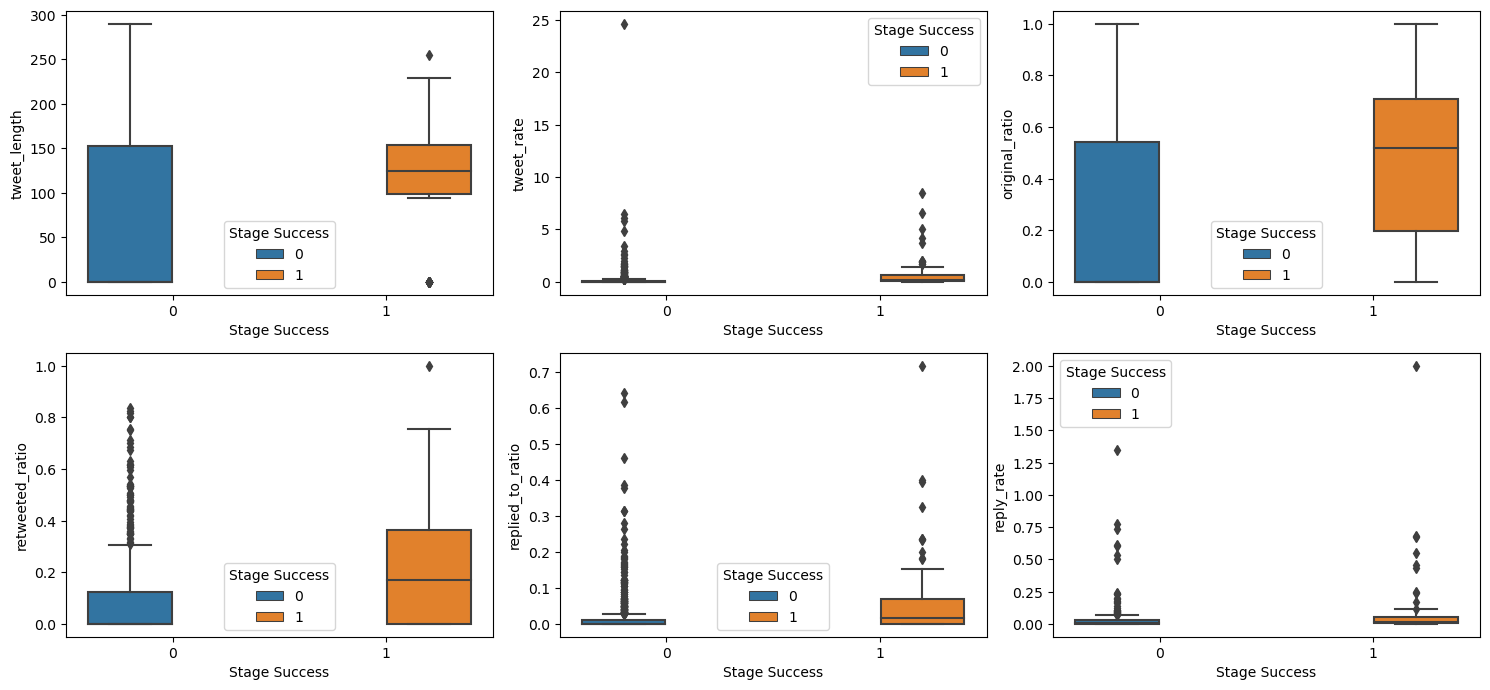

In [36]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(high_corr_vars, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='stage_success', y=var, data=df1, hue='stage_success')
  
    plt.xlabel('Stage Success')
    plt.ylabel(var)
    plt.legend(title='Stage Success', loc='best')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


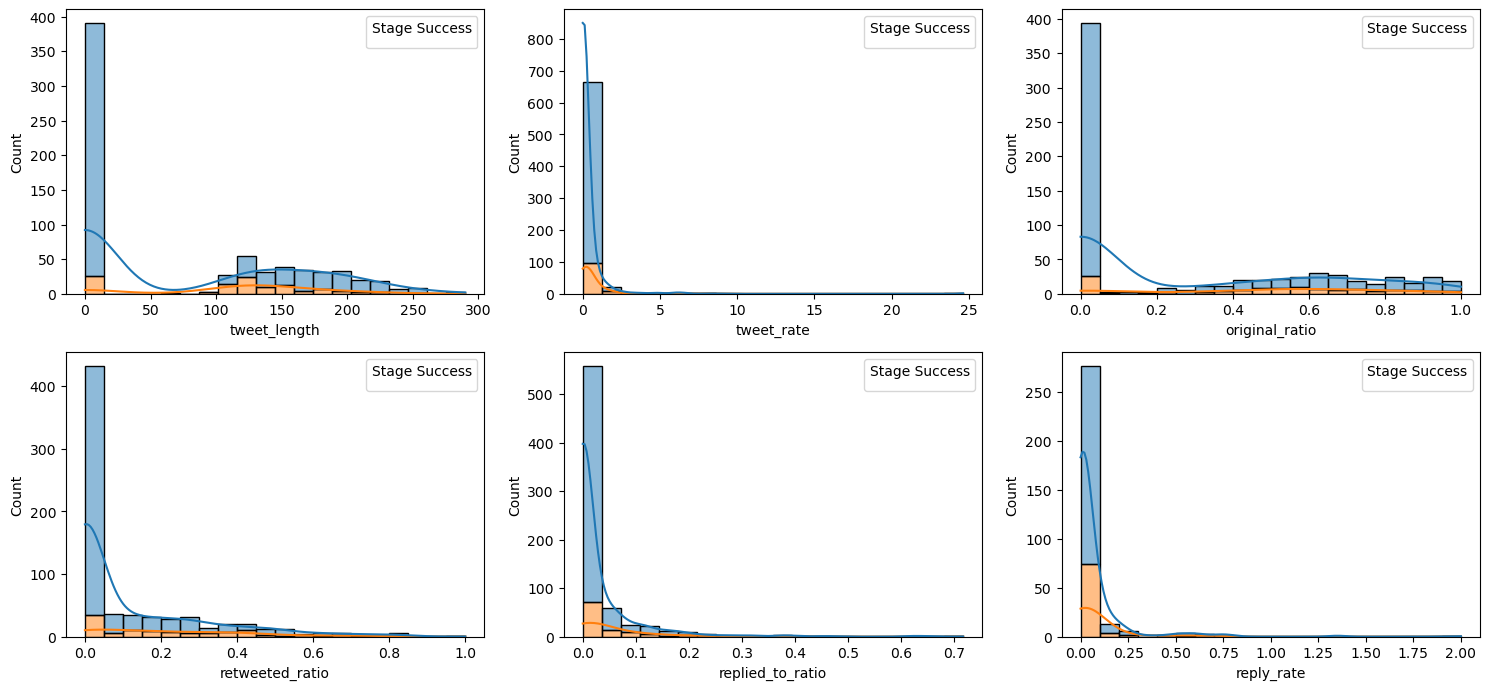

In [37]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(high_corr_vars, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df1, x=var, hue='stage_success', multiple='stack', kde=True, bins=20)

    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Stage Success', loc='best')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


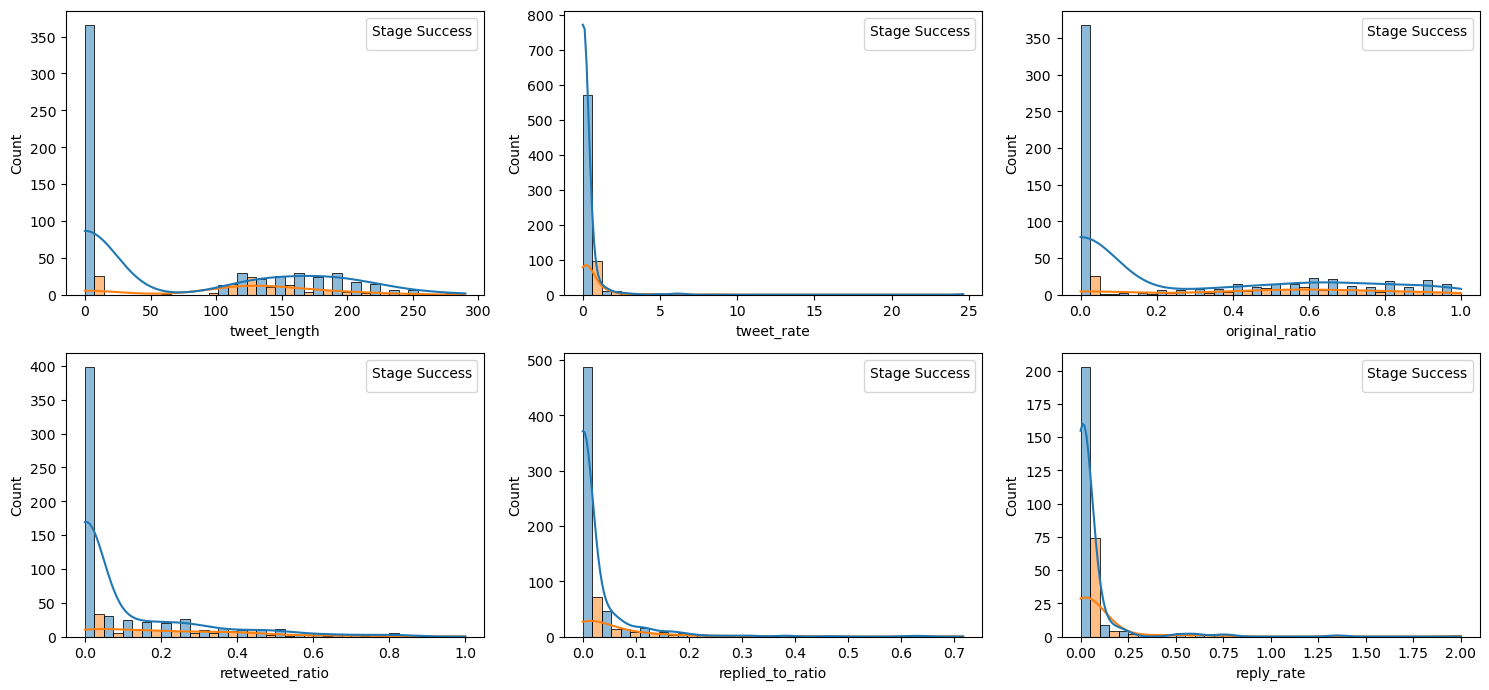

In [38]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(high_corr_vars, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df1, x=var, hue='stage_success', multiple='dodge', kde=True, bins=20)

    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Stage Success', loc='best')

plt.tight_layout()
plt.show()

### Train/Test split

## THE ACTUAL MODEL

In [39]:
#Dataset with 700 observations, filled NAs with 0s
df_filled = df1.fillna(0)
#df_filled = df1.dropna()

In [40]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'name' column
df_filled['name_enc'] = label_encoder.fit_transform(df_filled['name'])

# Display the DataFrame with the new 'name_enc' column
print(df_filled.head())

                     name  country                     city  web  tweet_count  \
0           N.P.T. S.R.L.    ITALY           VALSAMOGGIA BO    0          0.0   
1  ADVANCED MATERIALS SRL    ITALY                   LAIVES    1        636.0   
2            GRAPHENEA SA    SPAIN  SAN SEBASTIAN GUIPUZCOA    1          0.0   
3       CROIVALVE LIMITED  IRELAND                   DUBLIN    1          0.0   
4              OU COGNUSE  ESTONIA                  TALLINN    1        126.0   

   tweet_length  tweet_rate  original_ratio  retweeted_ratio  \
0      0.000000    0.000000        0.000000         0.000000   
1    170.550314    1.121693        0.630503         0.245283   
2      0.000000    0.000000        0.000000         0.000000   
3      0.000000    0.000000        0.000000         0.000000   
4    137.015873    0.049901        0.428571         0.444444   

   replied_to_ratio  ...  reply_count  reply_ratio  reply_rate  like_count  \
0          0.000000  ...          0.0     0.000000

In [41]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              700 non-null    object 
 1   country           700 non-null    object 
 2   city              700 non-null    object 
 3   web               700 non-null    int32  
 4   tweet_count       700 non-null    float64
 5   tweet_length      700 non-null    float64
 6   tweet_rate        700 non-null    float64
 7   original_ratio    700 non-null    float64
 8   retweeted_ratio   700 non-null    float64
 9   replied_to_ratio  700 non-null    float64
 10  quoted_ratio      700 non-null    float64
 11  retweet_count     700 non-null    float64
 12  retweet_ratio     700 non-null    float64
 13  reply_count       700 non-null    float64
 14  reply_ratio       700 non-null    float64
 15  reply_rate        700 non-null    float64
 16  like_count        700 non-null    float64
 1

In [42]:
df_filled['name']

0                   N.P.T. S.R.L.
1          ADVANCED MATERIALS SRL
2                    GRAPHENEA SA
3               CROIVALVE LIMITED
4                      OU COGNUSE
                  ...            
695                     SWEGAN AB
696           MILKWAYS HOLDING BV
697          Z.E.U. -INMUNOTEC SL
698    MILLOR ENERGY SOLUTIONS SL
699                      IKOI SPA
Name: name, Length: 700, dtype: object

In [43]:
target = df_filled['stage_success']
features = df_filled.select_dtypes(include='number').drop('stage_success', axis=1)

In [44]:
features.shape

(700, 19)

In [45]:
X_train , X_test , y_train , y_test = train_test_split(features, target , test_size = 0.2 , random_state = 100)
X_train

,web,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,retweet_ratio,reply_count,reply_ratio,reply_rate,like_count,like_rate,like_ratio,country_enc,city_enc,name_enc
491,1,228.0,200.828947,0.097228,0.859649,0.065789,0.039474,0.035088,194.0,0.850877,7.0,0.030702,0.002985,231.0,0.098507,1.013158,31,354,233
615,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4,166,115
277,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,26,394,476
404,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4,329,424
529,1,38.0,112.526316,0.043231,0.447368,0.315789,0.184211,0.052632,103.0,2.710526,6.0,0.157895,0.006826,45.0,0.051195,1.184211,14,50,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,31,51,305
53,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,291,181
350,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6,106,124
79,1,1.0,135.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000,0.000000,5.0,0.000000,5.000000,7,180,612


In [46]:
print(X_train.shape)
print(X_test.shape)

(560, 19)
(140, 19)


In [47]:
y_test.value_counts()

stage_success
0    116
1     24
Name: count, dtype: int64

In [48]:
y_train.value_counts()

stage_success
0    473
1     87
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# Fit and transform the training data
Train_X_std = robust_scaler.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=features.columns)

# Transform the testing data
Test_X_std = robust_scaler.transform(X_train)
Test_X_std = pd.DataFrame(Test_X_std, columns=features.columns)

### Dummy classifier

In [55]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier()
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search for our DummyClassifier
param_grid = {'strategy': ['most_frequent', 'stratified', 'uniform', 'constant'], 'constant': [0, 1, 2]}  # Include all strategies and possible constant values

# Create GridSearchCV object
grid_search_dummy = GridSearchCV(estimator=dummy_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_dummy.fit(X_train, y_train)

print("Best Parameters:", grid_search_dummy.best_params_)
print("Best Score:", grid_search_dummy.best_score_)

Best Parameters: {'constant': 0, 'strategy': 'most_frequent'}
Best Score: 0.8446428571428571


In [56]:
dummy_clf = DummyClassifier(strategy='most_frequent', constant=0)
dummy_clf.fit(X_train, y_train)
print("Accuracy of the dummy classifier:", dummy_clf.score(X_test, y_test))

Accuracy of the dummy classifier: 0.8285714285714286


In [57]:
y_pred = dummy_clf.predict(X_test)

In [58]:
y_pred_prob = dummy_clf.predict_proba(X_test)

In [59]:
cm_dummyclf = metrics.confusion_matrix(y_test, y_pred, labels=dummy_clf.classes_)
display(cm_dummyclf)

array([[116,   0],
       [ 24,   0]], dtype=int64)

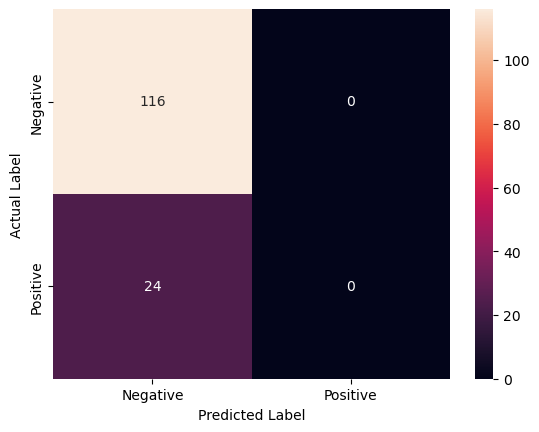

In [60]:
labels = ['Negative', 'Positive']
sns.heatmap(cm_dummyclf, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Our dummy classifier model is performing really bad, as it is predicting that all of the companies will NOT succeed. Therefore, we will try some other models to see if we can improve our predictions.

## Logistic regression

In [61]:
# Separate the target and features
Y = df_filled['stage_success']
X = df_filled.select_dtypes(include='number').drop('stage_success', axis=1)

# Split the dataset into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [66]:
robust_scaler = RobustScaler()

# Fit and transform the training data
Train_X_std = robust_scaler.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

# Transform the testing data
Test_X_std = robust_scaler.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
print(Test_X_std)

     web  tweet_count  tweet_length  tweet_rate  original_ratio  \
0   -1.0     0.000000      0.000000    0.000000        0.000000   
1    0.0     2.549451      0.616951    7.707634        0.307274   
2    0.0     0.138148      0.922308    0.284361        1.512159   
3    0.0     0.156986      1.044162    0.237304        0.731885   
4    0.0     0.000000      0.000000    0.000000        0.000000   
..   ...          ...           ...         ...             ...   
135  0.0     0.000000      0.000000    0.000000        0.000000   
136  0.0     0.477237      1.252306    1.221425        0.984893   
137  0.0     0.000000      0.000000    0.000000        0.000000   
138  0.0     0.000000      0.000000    0.000000        0.000000   
139  0.0     2.731554      1.260106    2.009595        1.128036   

     retweeted_ratio  replied_to_ratio  quoted_ratio  retweet_count  \
0           0.000000          0.000000      0.000000       0.000000   
1           0.578065         34.159941      0.000000 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(Train_X_std, Train_Y)

# Print the model coefficients (slope) and intercept
print("Model slope:", logreg.coef_[0])
print("Model intercept:", logreg.intercept_)

# Predict the values for the test dataset
y_pred = logreg.predict(Test_X_std)
y_pred_prob = logreg.predict_proba(Test_X_std)

# Calculate accuracy
accuracy = logreg.score(Test_X_std, Test_Y)

# Calculate confusion matrix
confusion_matrixlog = metrics.confusion_matrix(Test_Y, y_pred)

# Convert predictions and probabilities to DataFrame
predictions_df = pd.DataFrame({
    'Predicted': y_pred,
    'Probability_0': y_pred_prob[:, 0],
    'Probability_1': y_pred_prob[:, 1]
}, index=Test_X.index)

# Convert Test_Y to a DataFrame
Test_Y_df = pd.DataFrame(Test_Y, index=Test_X.index, columns=['stage_success'])

# Convert Test_X_std to a DataFrame with original column names
Test_X_std_df = pd.DataFrame(Test_X, columns=Train_X.columns, index=Test_X.index)

# Merge predictions and actual values with the original test dataset
merged_test_data = pd.concat([Test_X_std_df, Test_Y_df, predictions_df], axis=1)

# Optionally, you can add accuracy and confusion matrix to the merged DataFrame
merged_test_data['Accuracy'] = accuracy
merged_test_data['Confusion_Matrix'] = str(confusion_matrix)

# Merge the 'name' column from df_filled into merged_test_data based on 'name_enc'
merged_test_data = merged_test_data.merge(df_filled[['name_enc', 'name']], on='name_enc', how='left')

# Display the ones we want
successes = merged_test_data[(merged_test_data['Predicted'] == 1) & (merged_test_data['stage_success'] == 1)]

display(successes)


Model slope: [ 0.45673514 -0.38463937 -0.42140236  0.61801574  0.97270934  0.45390105
 -0.02350632 -0.10875767 -0.00942771  0.01481271  0.08798149  0.0499214
 -0.09355028 -0.08264859  0.06165761 -0.09064856  0.03372081 -0.02805402
  0.15437886]
Model intercept: [-2.48626443]


,web,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,retweet_ratio,...,country_enc,city_enc,name_enc,stage_success,Predicted,Probability_0,Probability_1,Accuracy,Confusion_Matrix,name
31,1,2534.0,112.831886,1.985893,0.459353,0.146014,0.393844,0.000789,2643.0,1.043015,...,18,396,116,1,1,3.027330e-01,0.697267,0.85,<function confusion_matrix at 0x000001FB1D3F1E40>,CARSHARE VENTURES BV
34,1,131.0,112.015267,0.334184,0.572519,0.404580,0.022901,0.000000,240.0,1.832061,...,6,285,311,1,1,4.896755e-01,0.510325,0.85,<function confusion_matrix at 0x000001FB1D3F1E40>,INDOORATLAS OY
62,1,116.0,123.551724,1.731343,0.301724,0.672414,0.025862,0.000000,727.0,6.267241,...,13,374,301,1,1,5.768340e-03,0.994232,0.85,<function confusion_matrix at 0x000001FB1D3F1E40>,ILLUSIVE NETWORKS LTD
78,1,374.0,111.580214,0.675090,0.414439,0.446524,0.069519,0.069519,2425.0,6.483957,...,7,386,188,1,1,4.643649e-01,0.535635,0.85,<function confusion_matrix at 0x000001FB1D3F1E40>,EASYMILE
132,1,10.0,142.100000,5.000000,0.600000,0.400000,0.000000,0.000000,107.0,10.700000,...,6,190,415,1,1,2.289182e-10,1.000000,0.85,<function confusion_matrix at 0x000001FB1D3F1E40>,NATURVENTION OY


Logistic - Carshare Ventures BV, Indooratlas OY, Illusive Networks LTD, Isotropic Systems LTD, Easy Mile, Naturvention OY

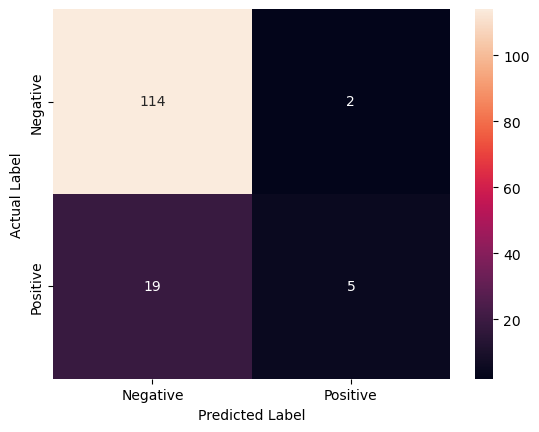

In [68]:
labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrixlog
, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

We get a precision of 0.75 which isnt bad but we will try to do better.

## Decision Tree


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Random forest should not have scaling done 

In [70]:
Y = df_filled['stage_success']
X = df_filled.select_dtypes(include='number').drop('stage_success', axis=1)

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)



# Define the parameter grid with a range of values for each parameter
param_grid = {
    'max_depth': [1,2],
    'ccp_alpha': [0.5,1 ,1.5],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None], # already tried others
    'max_features': [None], # already tested with others
    'max_leaf_nodes': [None, 1, 2],
    'min_impurity_decrease': [0.0, 0.1],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'random_state': [None, 1,]

}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Initialize the GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit the grid search to the data (assuming you have X_train and y_train)
grid_search.fit(Train_X, Train_Y)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best parameters found:  {'ccp_alpha': 0.5, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None}
Best cross-validation score:  0.8446428571428571


In [71]:
dec_tree_clf = DecisionTreeClassifier(ccp_alpha=.5, class_weight=None, criterion='gini', max_depth=1, max_features=None, 
                                      max_leaf_nodes=None, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0, random_state=None)
dec_tree_clf.fit(Train_X, Train_Y)

y_pred = dec_tree_clf.predict(Test_X)

y_pred_prob = dec_tree_clf.predict_proba(Test_X)

dec_treeclf = metrics.confusion_matrix(Test_Y, y_pred, labels=dec_tree_clf.classes_)
display(dec_treeclf)

array([[116,   0],
       [ 24,   0]], dtype=int64)

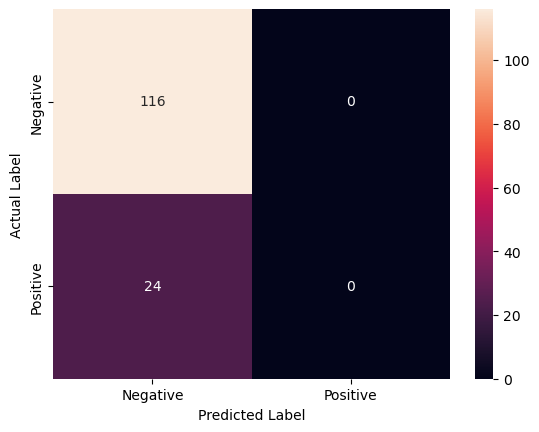

In [72]:
labels = ['Negative', 'Positive']
sns.heatmap(dec_treeclf, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Our decision tree model is performing really bad, as it is predicting that all of the companies will NOT succeed. Therefore, we will try some other models to see if we can improve our predictions.

## Random Forest

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid with a range of values for each parameter
param_grid = {
    'n_estimators': [50],                     # Number of trees in the forest
    'max_depth': [510],                    # Maximum depth of the tree
    'ccp_alpha': [0.0],                       # Complexity parameter for Minimal Cost-Complexity Pruning
    'min_samples_split': [2],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [ 3],                 # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],              # Function to measure the quality of a split
    'max_features': ['auto', 'log2'],              # The number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10],          # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0],     # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'min_weight_fraction_leaf': [0.0, 0.1],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
    'class_weight': [None],            # Weights associated with classes
    'random_state': [42]                           # Controls the randomness of the estimator
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Initialize the GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data (assuming you have X_train and y_train)
grid_search.fit(Train_X, Train_Y)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best parameters found:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 510, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'random_state': 42}
Best cross-validation score:  0.8571428571428572


In [74]:
from sklearn.ensemble import RandomForestClassifier

# Manually set parameters
params = {
    'ccp_alpha': 0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': 510,
    'max_features': 'log2',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 3,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'random_state': 42,
    'n_estimators': 50,  # Number of trees in the forest (not in the provided parameters)
}

# Create a RandomForestClassifier instance with the specified parameters
rf_model = RandomForestClassifier(**params)

In [75]:
rf_model.fit(Train_X, Train_Y)
y_pred = rf_model.predict(Test_X)
y_pred_prob = rf_model.predict_proba(Test_X)

# Calculate accuracy
accuracy = rf_model.score(Test_X, Test_Y)

# Calculate confusion matrix
confusion_matrixrf = metrics.confusion_matrix(Test_Y, y_pred)

# Convert predictions and probabilities to DataFrame
predictions_df = pd.DataFrame({
    'Predicted': y_pred,
    'Probability_0': y_pred_prob[:, 0],
    'Probability_1': y_pred_prob[:, 1]
}, index=Test_X.index)

# Convert Test_Y to a DataFrame
Test_Y_df = pd.DataFrame(Test_Y, index=Test_X.index, columns=['stage_success'])

# Convert Test_X to a DataFrame with original column names
Test_X_df = pd.DataFrame(Test_X, columns=Train_X.columns, index=Test_X.index)

# Merge predictions and actual values with the original test dataset
merged_test_data = pd.concat([Test_X_df, Test_Y_df, predictions_df], axis=1)

# Optionally, you can add accuracy and confusion matrix to the merged DataFrame
merged_test_data['Accuracy'] = accuracy
merged_test_data['Confusion_Matrix'] = str(confusion_matrix)

# Merge the 'name' column from df_filled into merged_test_data based on 'name_enc'
merged_test_data = merged_test_data.merge(df_filled[['name_enc', 'name']], on='name_enc', how='left')

# Display the ones we want
successes = merged_test_data[(merged_test_data['Predicted'] == 1) & (merged_test_data['stage_success'] == 1)]

display(successes)

,web,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,retweet_count,retweet_ratio,...,country_enc,city_enc,name_enc,stage_success,Predicted,Probability_0,Probability_1,Accuracy,Confusion_Matrix,name
1,1,406.0,94.135468,1.268750,0.184729,0.098522,0.716749,0.000000,319.0,0.785714,...,31,233,184,1,1,0.358135,0.641865,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,DUEDIL LIMITED
31,1,2534.0,112.831886,1.985893,0.459353,0.146014,0.393844,0.000789,2643.0,1.043015,...,18,396,116,1,1,0.421477,0.578523,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,CARSHARE VENTURES BV
34,1,131.0,112.015267,0.334184,0.572519,0.404580,0.022901,0.000000,240.0,1.832061,...,6,285,311,1,1,0.345397,0.654603,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,INDOORATLAS OY
62,1,116.0,123.551724,1.731343,0.301724,0.672414,0.025862,0.000000,727.0,6.267241,...,13,374,301,1,1,0.413381,0.586619,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,ILLUSIVE NETWORKS LTD
69,1,59.0,117.101695,0.246862,0.644068,0.237288,0.033898,0.084746,106.0,1.796610,...,10,55,26,1,1,0.351557,0.648443,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,AIMOTIVE INFORMATIKAI KORLATOLT FELELOSSEGU TA...
78,1,374.0,111.580214,0.675090,0.414439,0.446524,0.069519,0.069519,2425.0,6.483957,...,7,386,188,1,1,0.469032,0.530968,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,EASYMILE
91,1,304.0,154.042763,0.564007,0.710526,0.088816,0.095395,0.105263,1875.0,6.167763,...,18,13,130,1,1,0.489143,0.510857,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,CIWIT BV
121,1,5.0,122.600000,0.106383,0.400000,0.400000,0.200000,0.000000,6.0,1.200000,...,12,93,573,1,1,0.498821,0.501179,0.878571,<function confusion_matrix at 0x000001FB1D3F1E40>,SIRIUSXT LIMITED


Random Forest - Duedil Limited, Carshare Ventures BV, Indooratlas Oy, Illusive Networks LTD, Aimotive Informatikai Korlatolt felelossegu Ta, EasyMile, Ciwit BV, Siriusxt limited

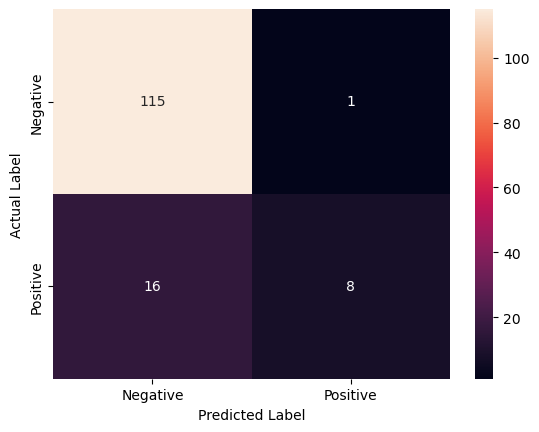

In [76]:
labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrixrf, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Random Forest is the best model so far as the precision is 88.9%, which means that from the 9 companies that we are predicting that will succeed, only 1 will not. Which gives us a lot of confidence to trust our investment in this model. We will be choosing the 5 companies based on the results of this Random Forest model.

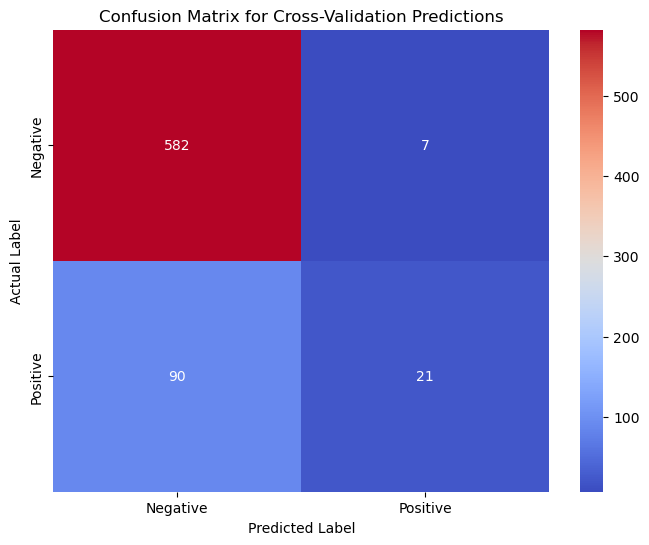

In [77]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=50)
y_pred_rfcv = cross_val_predict(rf_model, X, Y, cv=skf)

# Get the confusion matrix
cm = confusion_matrix(target, y_pred_rfcv)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title = plt.gca().set_title
plt.title('Confusion Matrix for Cross-Validation Predictions')
plt.show()

## XGBoost Classifier

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [79]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120   4]
 [ 11   5]]


0.8928571428571429

We do get a good accuracy but the recall is what is important and our precision is really bad where 55% of our positive predictions will end up being unsuccessful.

## Neural Network

In [84]:
X = df_filled.select_dtypes(include='number').drop('stage_success', axis=1).to_numpy()
Y = df_filled['stage_success'].to_numpy(dtype = float ) 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit and transform the training data
robust_scaler = RobustScaler()

# Fit and transform the training data
Train_X_std = robust_scaler.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)

# Transform the testing data
Test_X_std = robust_scaler.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=Test_X.columns)


In [86]:

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [ (20), (15), (12)], # i tried using more layers with higher neurons but in the end it made the accuracy lower. But the precision was higher... bc the problem we are solving doesnt really require higher precision i will aim to make the accuracy the highest.
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.00001],
    'learning_rate': ['constant'],
    'max_iter': [200, 500],
    'learning_rate_init': [0.001],
    'momentum': [0.9],
    'early_stopping': [True, False],
    'validation_fraction': [0.3, 0.4]
}
# it took a long time to load so thats why you dont see a lot of options in easch parameter but I did test each one.

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(Train_X_std, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'solver': 'adam', 'validation_fraction': 0.4}


In [90]:
# Train the final model with the best parameters
best_params = grid_search.best_params_
final_model = MLPClassifier(**best_params, random_state=42)
final_model.fit(Train_X_std, y_train)

# Make predictions with the final model
y_pred = final_model.predict(Test_X_std)

from sklearn.metrics import accuracy_score, classification_report

# Assuming y_train is your target variable for training data
baseline_accuracy = 1 - sum(y_train) / len(y_train)
print("Baseline Accuracy:", baseline_accuracy)

# Assuming y_test is your target variable for testing data and y_pred are the model predictions
model_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", model_accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Baseline Accuracy: 0.8357142857142857
Model Accuracy: 0.7571428571428571
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       121
         1.0       0.06      0.05      0.06        19

    accuracy                           0.76       140
   macro avg       0.46      0.46      0.46       140
weighted avg       0.75      0.76      0.75       140



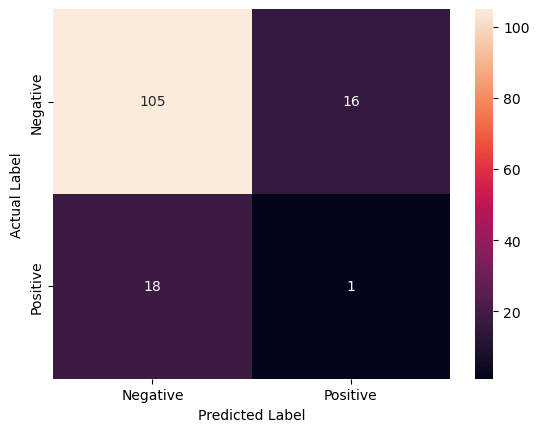

accuracy 0.7571428571428571
precision 0.058823529411764705
recall: 0.05263157894736842


In [91]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=final_model.classes_)
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("accuracy",metrics.accuracy_score(y_test, y_pred))
# Precision
print("precision",metrics.precision_score(y_test, y_pred))
#Of all the instances the model identified as positive, how many were actually relevant?

# Recall
print("recall:", metrics.recall_score(y_test, y_pred))
#Of all the relevant instances in the dataset, how many did the model correctly identify?

The results here are also bad. Only a 50% precision which is not good.

## Top 5 companies to invest on - Based on Random Forest model.

In [ ]:
ordered_suc= successes.sort_values(by='Probability_1', ascending=False)
ordered_suc

## Results

In the end the random forest gave us the best result. with a precision of success of 88.9%. We will get the 5 companies from this one. 

#### Companies the model choses to be successful
Logistic - Carshare Ventures BV, Indooratlas OY, Illusive Networks LTD, Isotropic Systems LTD, Easy Mile, Naturvention OY
Decision Tree - 0 
Random Forest - Duedil Limited, Carshare Ventures BV, Indooratlas Oy, Illusive Networks LTD, Aimotive Informatikai Korlatolt felelossegu Ta, EasyMile, Ciwit BV, Siriusxt limited
Neural Network - Velco, Thrustme, Ability Pharma SL, Industrial Phycology Limited, Aurelia Turbines Oy

Repeated - Carshare Ventures BV, Easymile , Illusive Networks LTD

High probability of being success from Random Forest model - Duedil Limited, Aimotive Informatikai Korlatolt felelossegu Ta, Indooratlas Oy

### Based on the model
Here are the companies and the probability of success given by the model.
We will invest in Carshare Ventures BV (0.70), Easymile(0.53) , Illusive Networks LTD(0.58), Duedil Limited(0.64), Indooratlas Oy(0.65)

Venture Capital: Venture capital investments, which are higher risk, aim for even higher returns. Successful venture capitalists might expect returns of 30-50% per year, but these returns come with a high degree of risk and variability.
Reference: NVCA on Venture Capital Returns

*Carshare Ventures BV*:
- Success Probability: 0.70
- Investment: approx 1,130,000

*Easymile*:
- Success Probability: 0.53
- Investment: approx 855,000

*Illusive Networks LTD*:
- Success Probability: 0.58
- Investment: approx 935,000

*Duedil Limited*:
- Success Probability: 0.64
- Investment: approx 1,030,000

*Indooratlas Oy*:
- Success Probability: 0.65
- Investment: approx 1,050,000

### Final Investment Allocation:

- *Carshare Ventures BV*: $1,130,000

- *Easymile*: $855,000

- *Illusive Networks LTD*: $935,000

- *Duedil Limited*: $1,030,000

- *Indooratlas Oy*: $1,050,000

This allocation ensures that more funds are allocated to companies with higher success probabilities, while still diversifying the investment to mitigate risk.

Carshare Ventures BV:
- Investment: $1,130,000

- Expected Return: $451,239

Illusive Networks LTD:

- Investment: $935,000

- Expected Return: $374,067

Duedil Limited:

- Investment: $1,030,000

- Expected Return: $412,125

Indooratlas Oy:

- Investment: $1,050,000

- Expected Return: $420,568

Easymile (Failure): we allow for this to fail based off 1/9 failure. 

- Investment: $855,000

- Expected Return: $0

Summary:

- Total Investment: $5,000,000

- Total Expected Return (with Easymile failing): $1,658,000 per year

The chance of one of the companies failing that we choose is 1/9, so we assumed the worst above. 

If we were to have all businesses being a success, then our return would be the 40% return per year we desire and make 2,000,000.